# Poshem Technology:

## Data Information:

| Column    | Explanation                                                                                   |
|-----------|-----------------------------------------------------------------------------------------------|
| Age       | Represents the age of the individual.                                                        |
| Job       | Indicates the occupation or job title of the individual.                                      |
| Marital   | Denotes the marital status of the individual (e.g., married, single, divorced).               |
| Education | Specifies the highest level of education attained by the individual.                           |
| Default   | Indicates whether the individual has defaulted on any financial obligations (e.g., loans).     |
| Balance   | Represents the account balance or financial status of the individual.                          |
| Housing   | Indicates whether the individual has a housing loan.                                           |
| Loan      | Specifies whether the individual has any other type of loan.                                   |
| Contact   | Denotes the method of communication used to contact the individual (e.g., cellular/mobile, telephone). |
| Day       | Represents the day of the month when the contact was made or the data was recorded.            |
| Month     | Denotes the month when the contact was made or the data was recorded.                          |
| Duration  | Represents the duration of the contact in seconds.                                             |
| Campaign  | Indicates the number of contacts performed during this campaign for this individual.          |
| Pdays     | Represents the number of days since the individual was last contacted from a previous campaign (-1 indicates not previously contacted). |
| Previous  | Denotes the number of contacts performed before this campaign for this individual.            |
| Poutcome  | Specifies the outcome of the previous marketing campaign for this individual.                 |
| Deposit   | Indicates whether the individual has made a deposit or not.                                     |


## Importing Libraries:

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import plotly.express as px

In [6]:
import warnings

## Ignoring unwanted warnings and errors

In [7]:
warnings.filterwarnings("ignore")

## Reading Data:

In [8]:
df = pd.read_csv('bank.csv')

## Displaying Data

In [9]:
df.head(5) # Displaying first 5 rows.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [10]:
df.tail(5) # Displaying last 5 rows.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


## EDA: Exploring our dataset

In [11]:
df.shape

(11162, 17)

In [12]:
df.columns = df.columns.str.capitalize()

In [13]:
df.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing',
       'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign', 'Pdays',
       'Previous', 'Poutcome', 'Deposit'],
      dtype='object')

In [14]:
df.describe()

,Age,Balance,Day,Duration,Campaign,Pdays,Previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [15]:
df.isnull().sum()

Age          0
Job          0
Marital      0
Education    0
Default      0
Balance      0
Housing      0
Loan         0
Contact      0
Day          0
Month        0
Duration     0
Campaign     0
Pdays        0
Previous     0
Poutcome     0
Deposit      0
dtype: int64

## Label Encoding:

It is a method of converting categorical variables into numerical labels

Cat >> 0. 

Dog >> 1.

Now, we will encode all our categorical columns using 'Scikit-learn'. Making the analysis more effective.

### Creating a copy of our dataframe to save ourselves from data loss:

In [16]:
df2 = df.copy()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label_encoder = LabelEncoder()

In [19]:
for column in df.columns:
    if df2[column].dtypes == "object":
        df2[column] = label_encoder.fit_transform(df2[column])

In [20]:
df.head(3) # Displaying the data before transformation

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes


In [21]:
df2.head(3) # Displaying the data after transformation # We will use this data for ML.

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1


### Saving our cleaned data:

In [22]:
df2.to_csv('bank_cleaned.csv', index=False) # You can either save this data separately or override the data.

## Visualizing our data:

<AxesSubplot:>

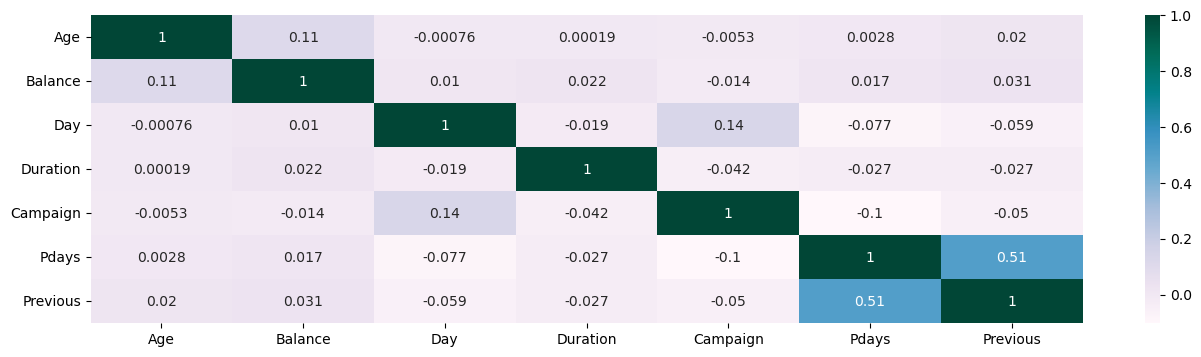

In [23]:
plt.figure(figsize=(16, 4))
sns.heatmap(df.corr(), cmap='PuBuGn', annot=True) # Before Encoding

<AxesSubplot:>

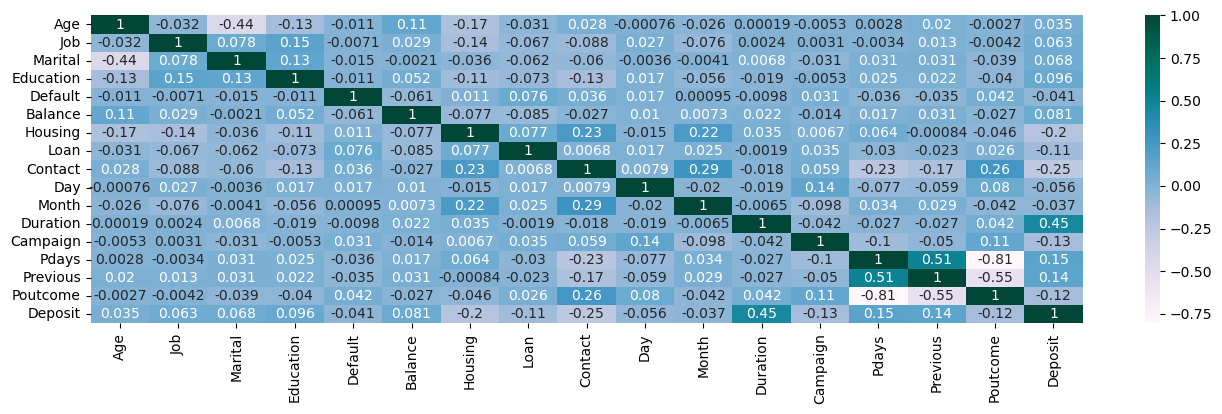

In [24]:
plt.figure(figsize=(16, 4))
sns.heatmap(df2.corr(), cmap='PuBuGn', annot=True) # After Encoding

## Analyzing Categorical Features only:

### Analyzing data using countplot:

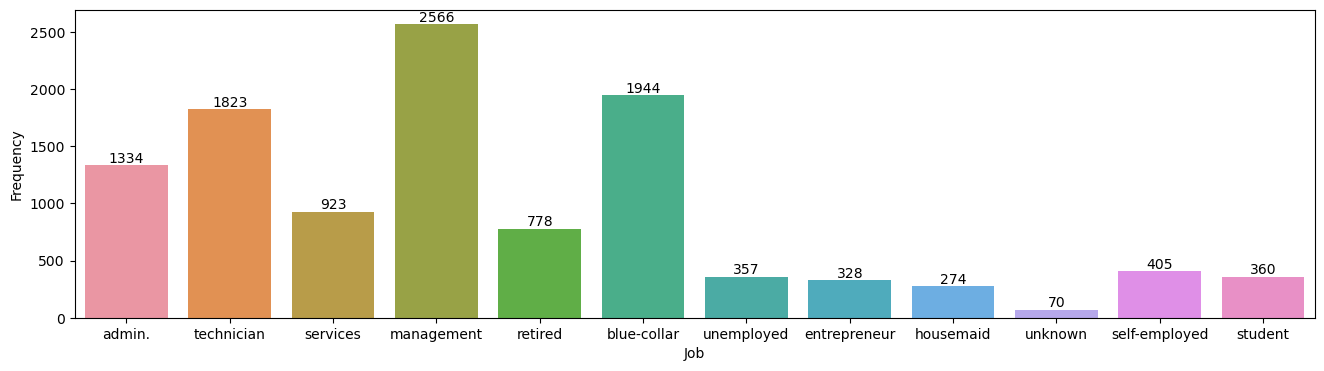

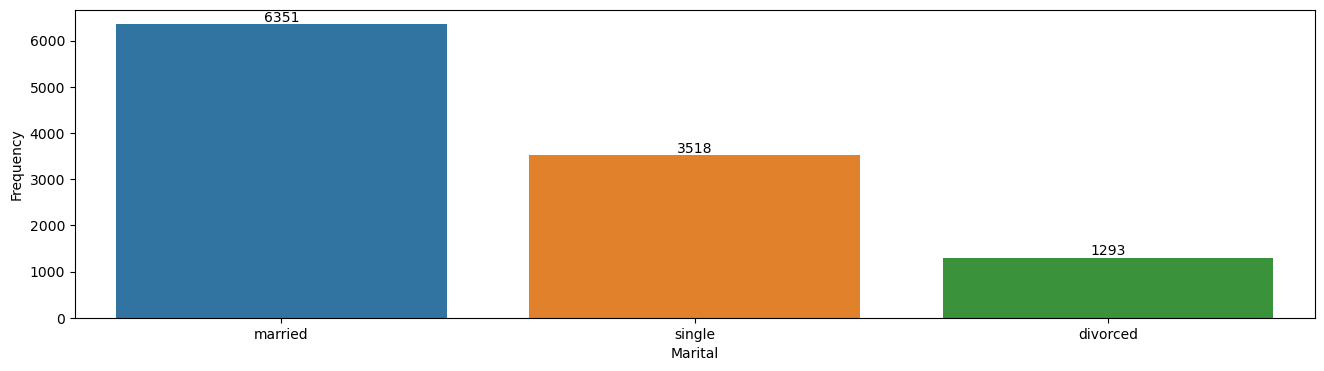

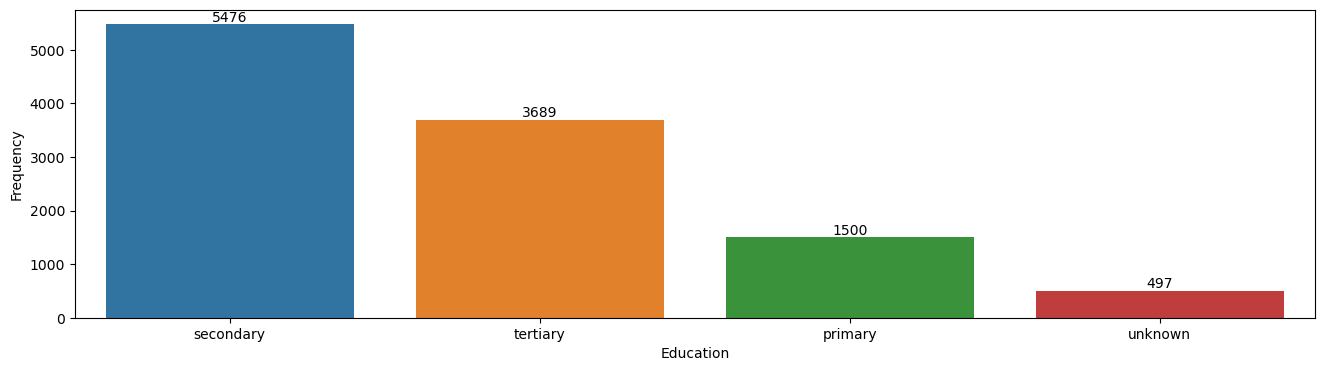

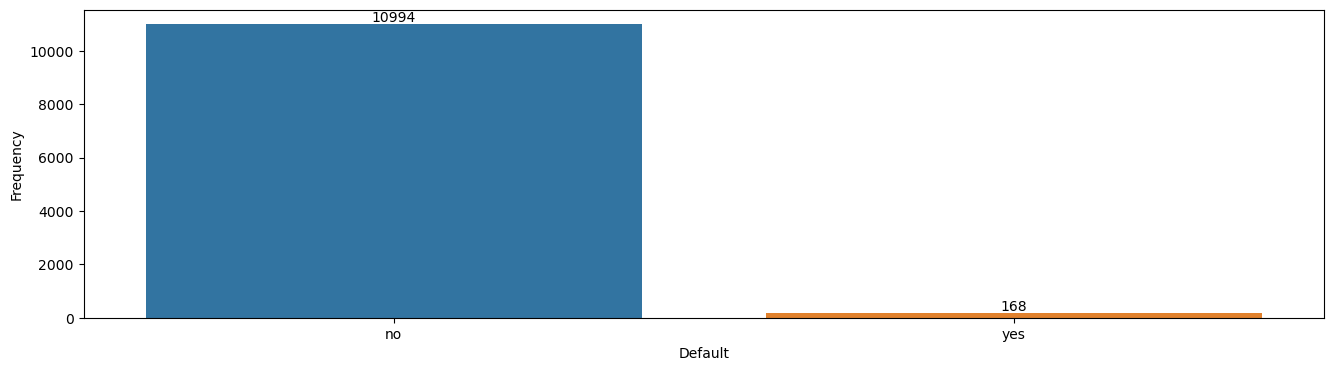

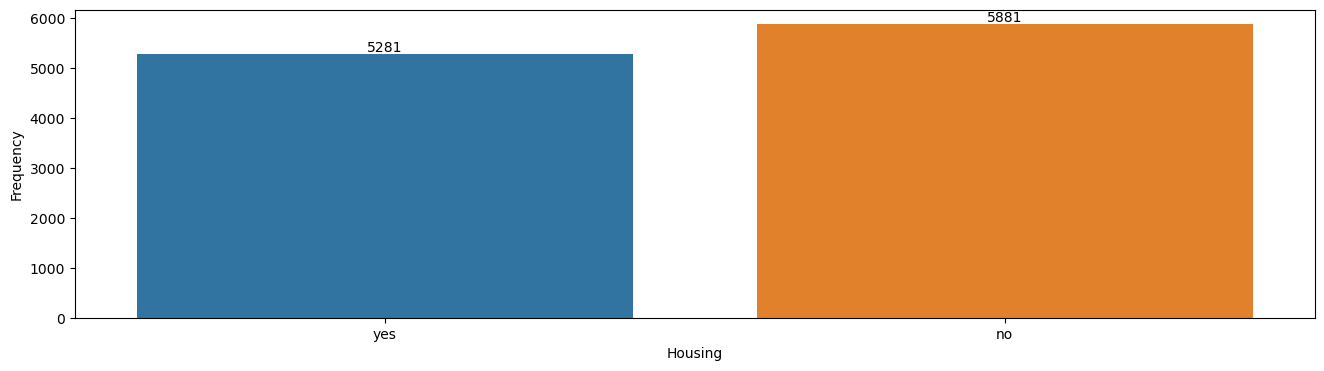

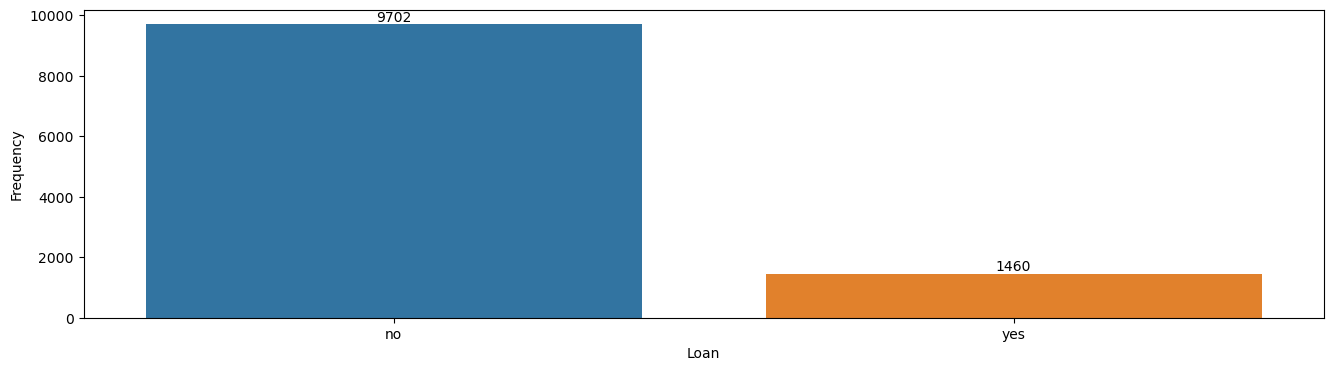

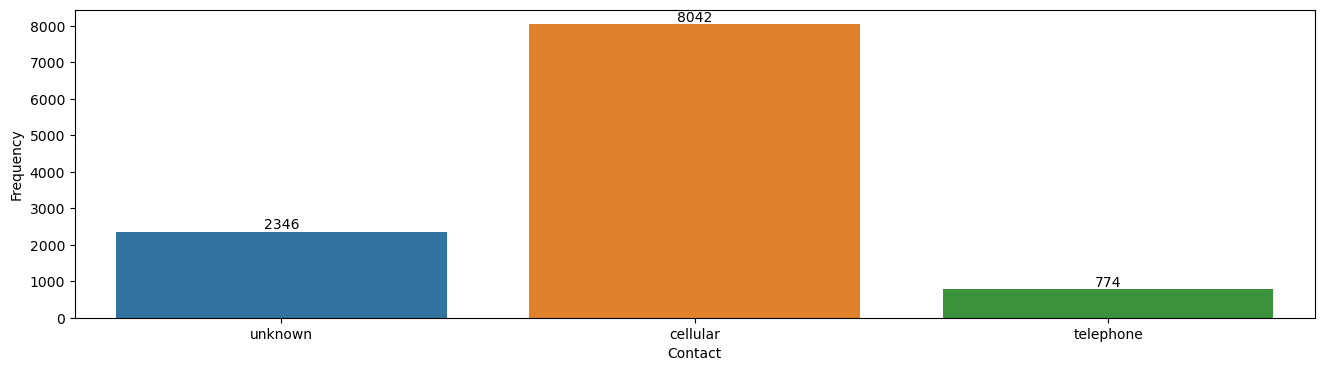

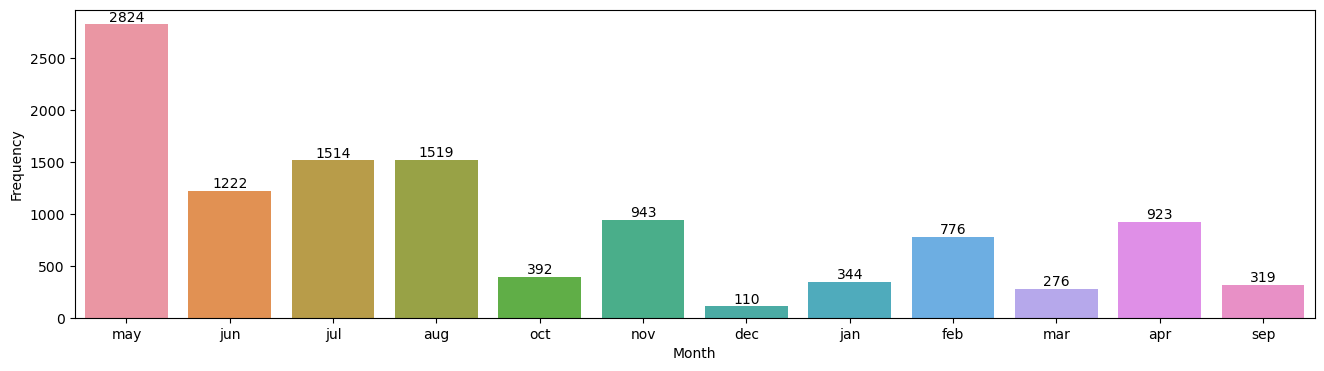

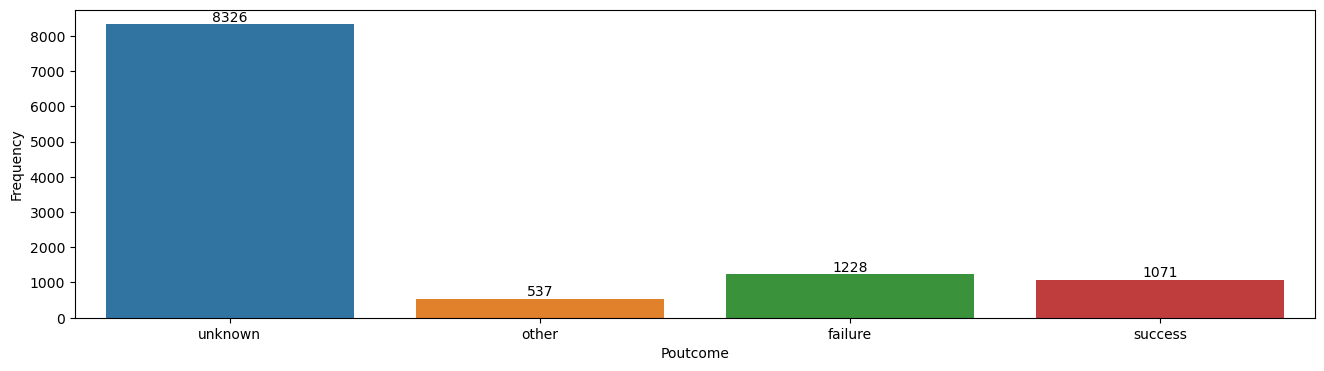

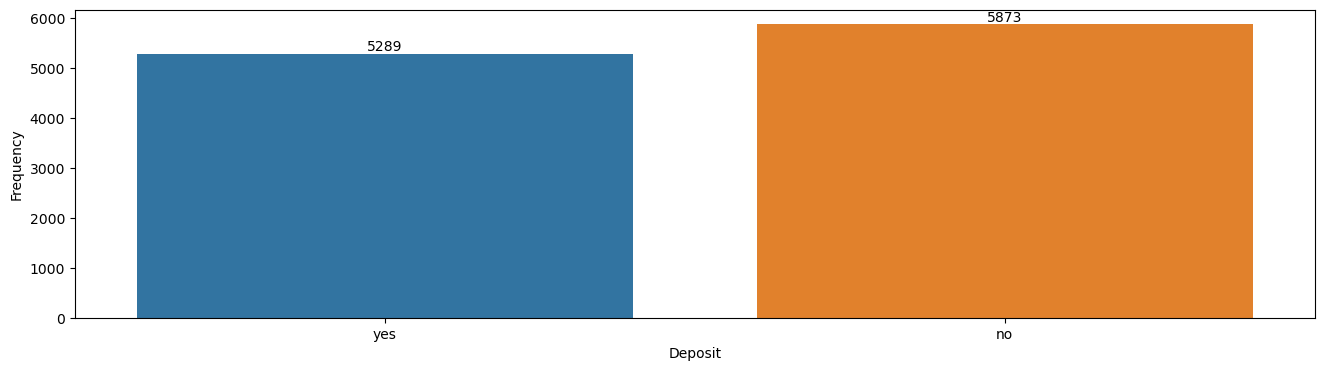

In [25]:
for column in df.columns:
    if df[column].dtypes == "object":
        plt.figure(figsize=(16, 4))
        ax = sns.countplot(df[column])
        plt.ylabel('Frequency')
        for i in ax.containers:
            ax.bar_label(i)
        plt.show()

### Found Insights:

Here are the key insights we discovered: 
    
   * The top three jobs are:
   
       * management,
       * blue-collar jobs, 
       * technician. 
       
   * The majority of people are married. 
   
   * The majority of people have a secondary level education. 
   
   * Approximately 98% of 11162 people are not defaulters. 
   
   * Approximately 87% of 11162 people have taken loans. 
   
   * The majority used cellular/mobile phones to communicate.
   
   * The majority of cash flow occurs in May. Following May, August has the highest.
   
   * Out of 11162 people, 5873, or almost 52%, have chosen to make a deposit.

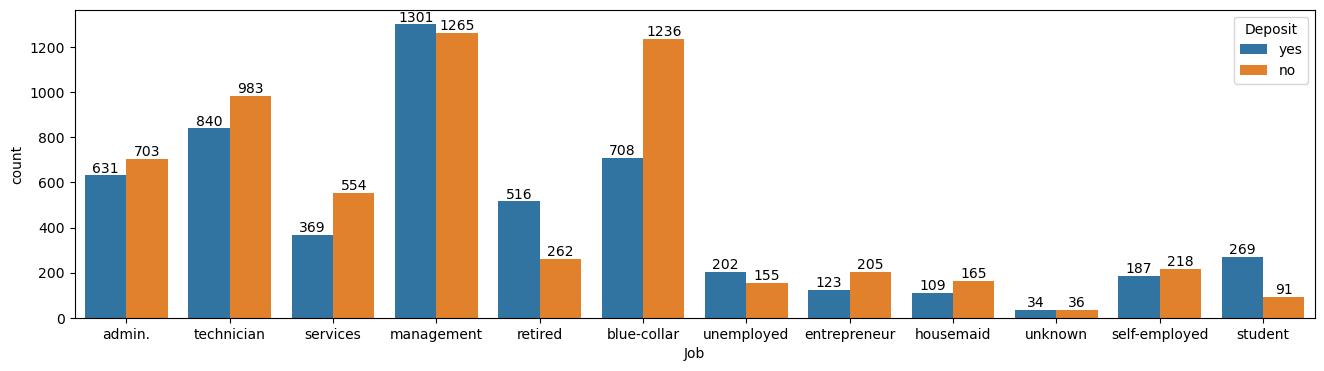

In [26]:
plt.figure(figsize=(16, 4))
ax = sns.countplot(data=df, x='Job', hue='Deposit')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

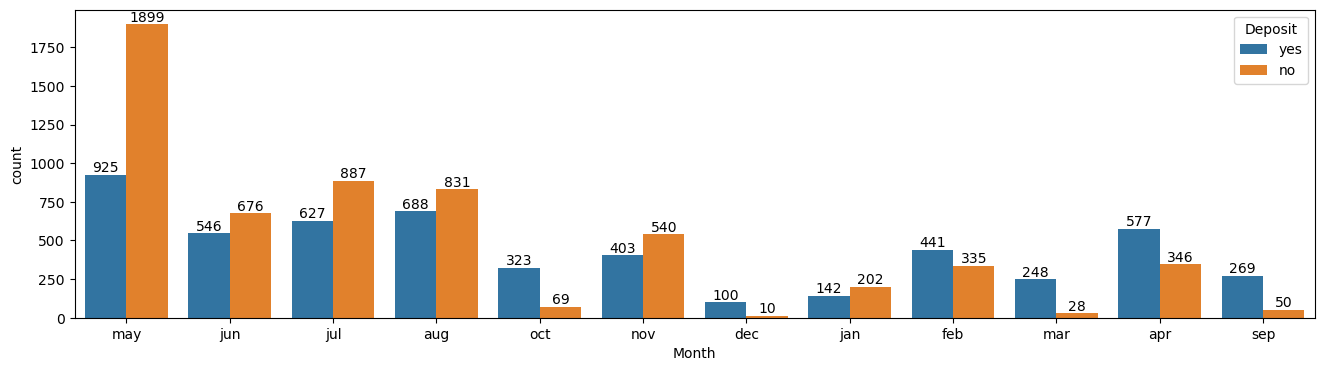

In [27]:
plt.figure(figsize=(16, 4))
ax = sns.countplot(data=df, x='Month', hue='Deposit')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

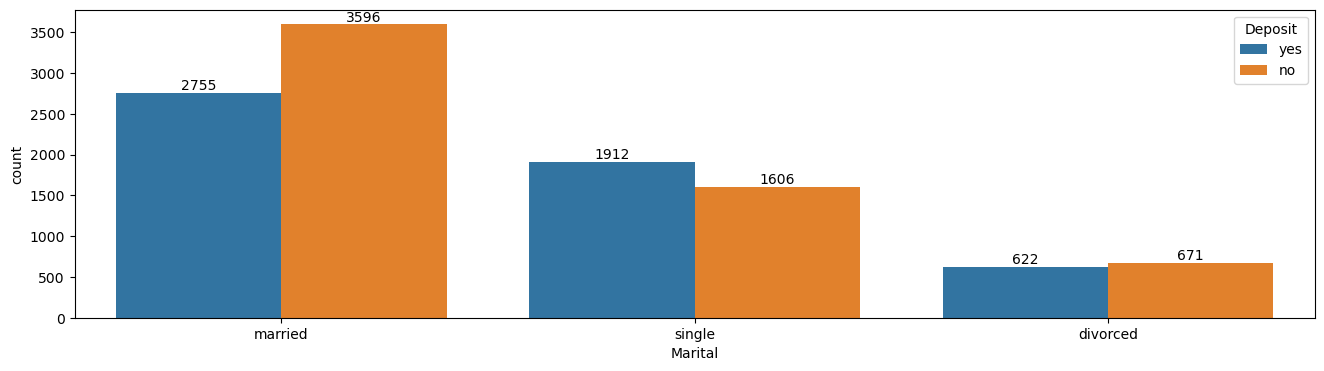

In [28]:
plt.figure(figsize=(16, 4))
ax = sns.countplot(data=df, x='Marital', hue='Deposit')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

### Found Insights:

Here are the key insights we discovered:

* We can see that people from various job backgrounds (management, students, and retirees) are more likely to make a deposit. 

* Meanwhile, people from these job backgrounds (blue-collar, technicians, and administrators) do not prefer to make deposits.

* People do not want to deposit in the months of May, July, and August.

* People tend to choose April, February, and October for deposits.

* Single persons are more likely to make deposits, while married people are less likely to do so.

## Analyzing Numeric Features only:

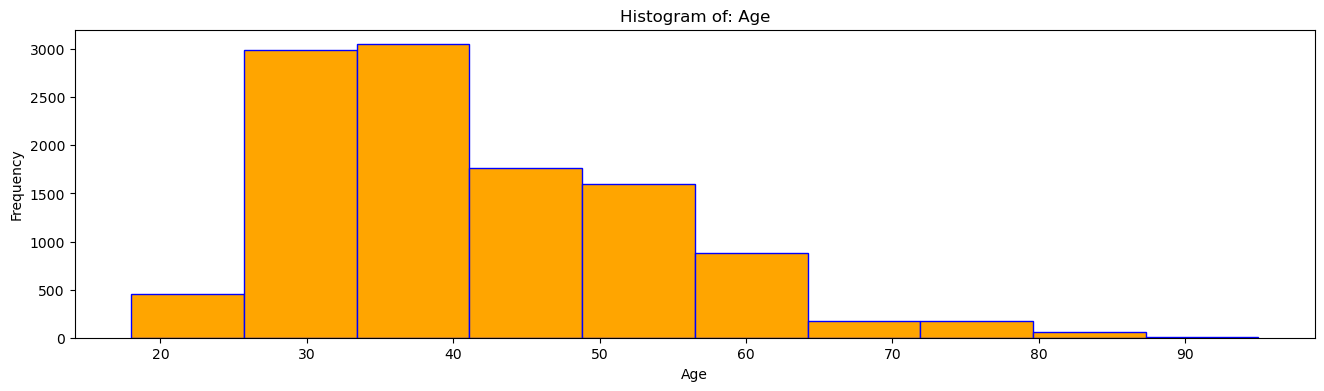

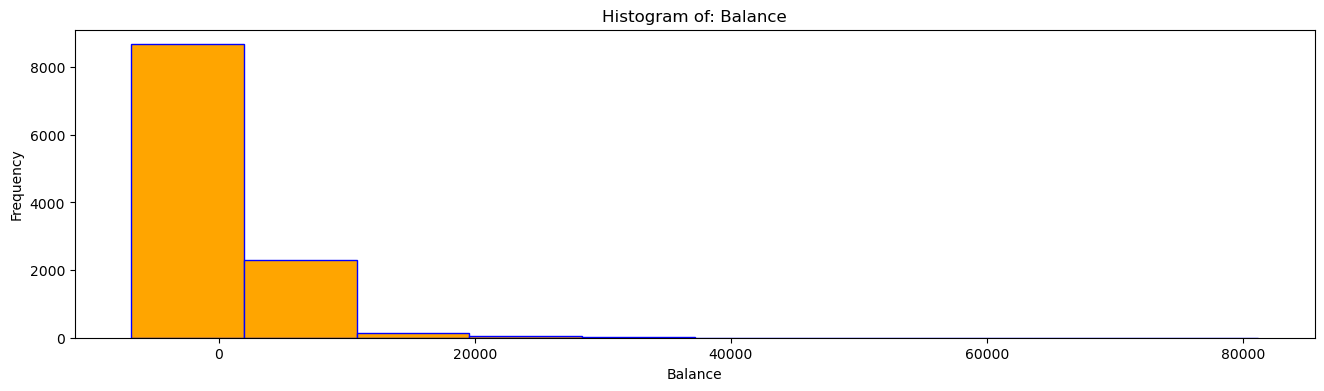

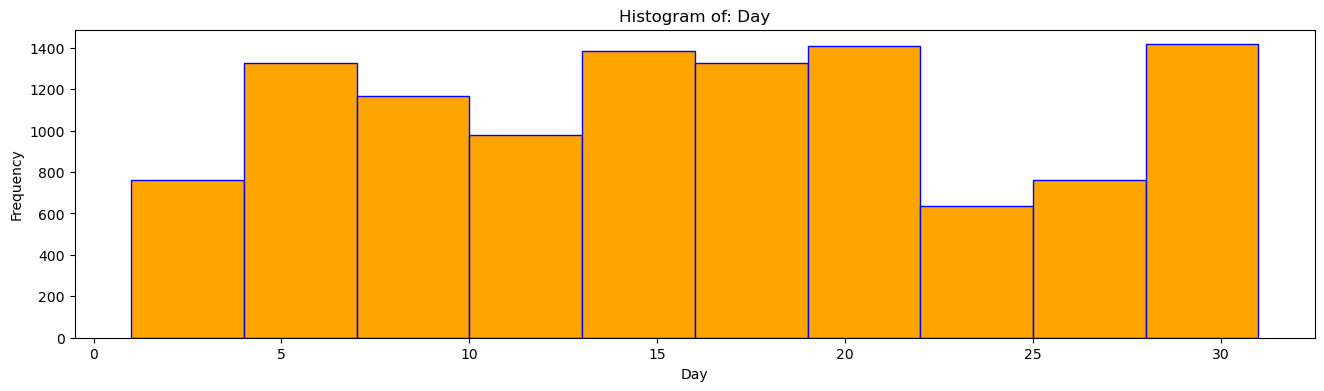

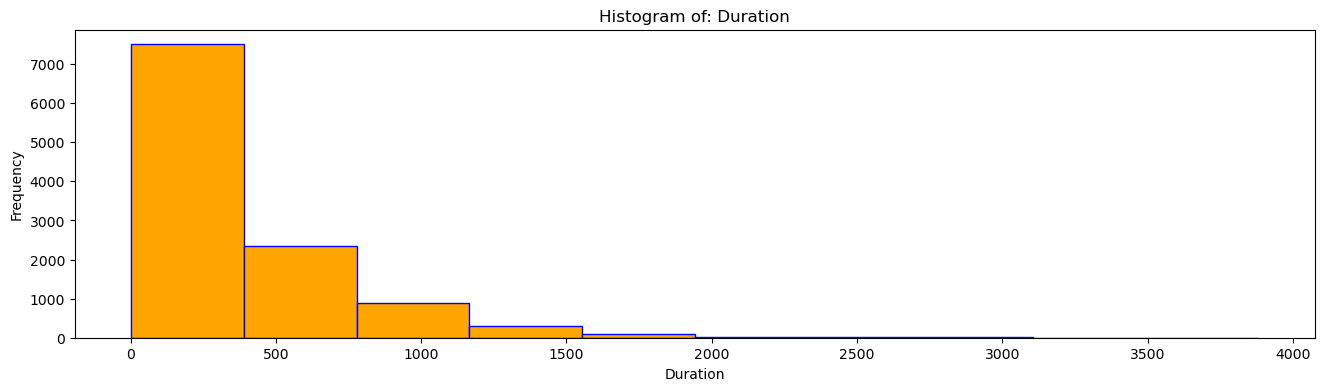

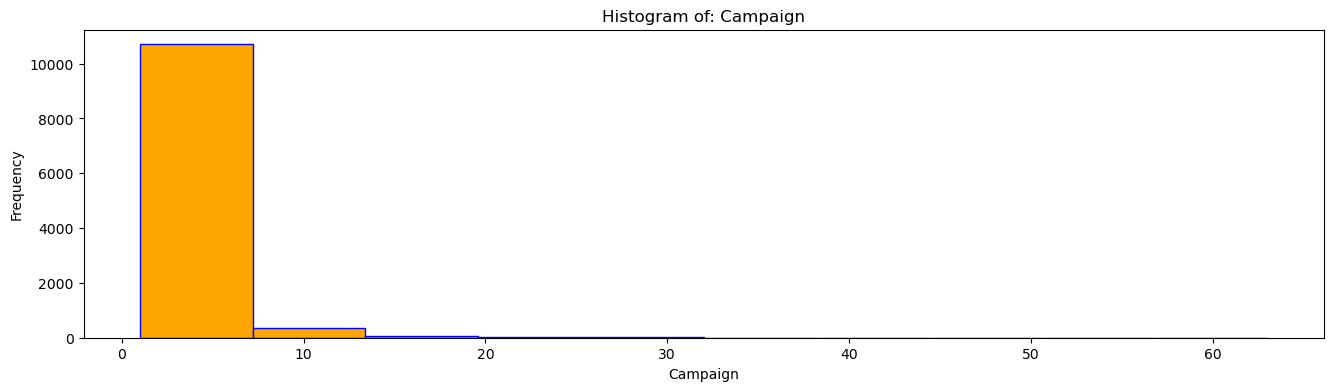

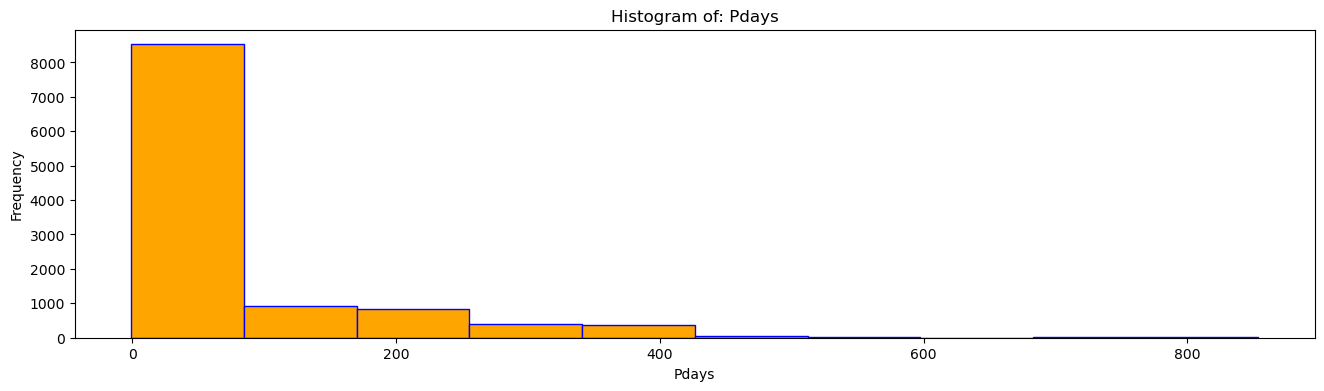

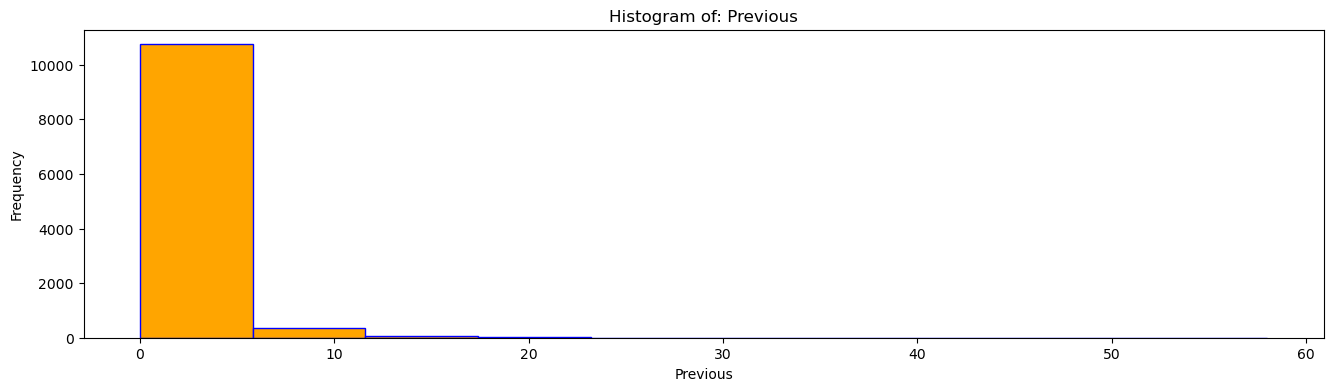

In [29]:
for column in df.columns:
    if df[column].dtypes != "object":
        plt.figure(figsize=(16, 4))
        plt.hist(df[column], bins=10, color='orange', edgecolor='blue')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title('Histogram of: ' + column)
        plt.show()

### Found Insights:

Here are the key insights we discovered:

* We have people mostly aged between 25 to 60. people aged between 35 to 40 are the highest in age group. 

* People are more interested in making their deposits after each 5 days.

* This duration lasts from 0 to 500 mostly.

In [30]:
# Done